In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
from collections import defaultdict
import networkx as nx
from itertools import chain

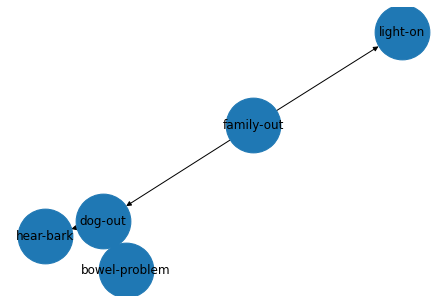

In [2]:
dog_network = BayesNet()
dog_network.load_from_bifxml('testing/dog_problem.BIFXML')
dog_network.draw_structure()

In [3]:
reasoner = BNReasoner(dog_network)

q = ['hear-bark']
start_cpt = reasoner.prior_marginal(q)
start_cpt

,hear-bark,p
0,False,0.289885
1,True,0.710115
